In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import random 
import statistics as st

In [20]:
df = pd.DataFrame(index=range(0, 10000), columns=['user_id', 'order_number', 'click2delivery', 'order_items_sum', 'retention'])
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [21]:
#1 колонка
s = string.digits + string.ascii_lowercase
s = s[:22]
_s = ''

for i in range(0,10000):
    df.at[i, 'user_id'] = _s
    _s = ''
    for j in range(0,15):
        _random = random.randint(1,15)
        _s += s[_random]

In [22]:
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,,NaN,NaN,NaN,NaN
1,655a1e17ab94e79,NaN,NaN,NaN,NaN
2,8fffcc162599f77,NaN,NaN,NaN,NaN
3,c177c2aa725858b,NaN,NaN,NaN,NaN
4,581ccd7629f97eb,NaN,NaN,NaN,NaN


In [23]:
#2 колонка
for i in range(0, 10000):
    df.at[i, 'order_number'] = random.randint(1,10)
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,,8,NaN,NaN,NaN
1,655a1e17ab94e79,6,NaN,NaN,NaN
2,8fffcc162599f77,6,NaN,NaN,NaN
3,c177c2aa725858b,3,NaN,NaN,NaN
4,581ccd7629f97eb,6,NaN,NaN,NaN


In [24]:
#3колонка
for i in range(0, 10000):
    df.at[i, 'click2delivery'] = np.random.normal(1440, 200)
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,,8,1205.606028,NaN,NaN
1,655a1e17ab94e79,6,1516.935497,NaN,NaN
2,8fffcc162599f77,6,1620.258866,NaN,NaN
3,c177c2aa725858b,3,1484.983608,NaN,NaN
4,581ccd7629f97eb,6,1504.528924,NaN,NaN


In [25]:
#4 колонка
for i in range(0, 10000):
    df.at[i, 'order_items_sum'] = np.random.exponential(scale=1/1) + 1
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,,8,1205.606028,2.86841,NaN
1,655a1e17ab94e79,6,1516.935497,1.352177,NaN
2,8fffcc162599f77,6,1620.258866,1.828284,NaN
3,c177c2aa725858b,3,1484.983608,3.037134,NaN
4,581ccd7629f97eb,6,1504.528924,1.265823,NaN


In [26]:
#5 колонка
for i in range(0, 10000):
    df.at[i, 'retention'] = np.random.choice([1,2,3,4,5], p = [0.35,0.25,0.2,0.15,0.05])
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,,8,1205.606028,2.86841,2
1,655a1e17ab94e79,6,1516.935497,1.352177,4
2,8fffcc162599f77,6,1620.258866,1.828284,3
3,c177c2aa725858b,3,1484.983608,3.037134,4
4,581ccd7629f97eb,6,1504.528924,1.265823,4


In [27]:
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention
0,,8,1205.606028,2.86841,2
1,655a1e17ab94e79,6,1516.935497,1.352177,4
2,8fffcc162599f77,6,1620.258866,1.828284,3
3,c177c2aa725858b,3,1484.983608,3.037134,4
4,581ccd7629f97eb,6,1504.528924,1.265823,4


Задача 1: Для всех строк исходного датасета, сгрупированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

In [28]:
#Группируем по номеру заказа
grouped = df.groupby('order_number')['click2delivery'].mean()
grouped

order_number
1     1432.887888
2     1432.045127
3     1440.661854
4     1434.410649
5     1434.701399
6     1440.439471
7     1442.223074
8     1440.300254
9       1434.9495
10    1443.751019
Name: click2delivery, dtype: object

In [29]:
#Считаем среднее и добавляем в новый столбец
df['average_delivery_time'] = df['order_number'].map(grouped)
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention,average_delivery_time
0,,8,1205.606028,2.86841,2,1440.300254
1,655a1e17ab94e79,6,1516.935497,1.352177,4,1440.439471
2,8fffcc162599f77,6,1620.258866,1.828284,3,1440.439471
3,c177c2aa725858b,3,1484.983608,3.037134,4,1440.661854
4,581ccd7629f97eb,6,1504.528924,1.265823,4,1440.439471


Задача 2: Отдельной колонкой 

In [30]:
for i in range(len(df)):
    if i == 0:
        fib = 0.1
        df.at[i,'fib'] = 0.1
    elif i == 1:
        df.at[i,'fib'] = 0.5*0.1
    elif i > 1:
        df.at[i,'fib']=(df.loc[i-2, 'fib'] + df.loc[i-1, 'fib'])*0.5 
df['fib'].head(20)
df.head(5)

,user_id,order_number,click2delivery,order_items_sum,retention,average_delivery_time,fib
0,,8,1205.606028,2.86841,2,1440.300254,0.10000
1,655a1e17ab94e79,6,1516.935497,1.352177,4,1440.439471,0.05000
2,8fffcc162599f77,6,1620.258866,1.828284,3,1440.439471,0.07500
3,c177c2aa725858b,3,1484.983608,3.037134,4,1440.661854,0.06250
4,581ccd7629f97eb,6,1504.528924,1.265823,4,1440.439471,0.06875


In [42]:
def task_4(user_id):
    letter = sorted([str(s) for s in user_id if s.isalpha()])
    digit = sorted([s for s in user_id if s.isdigit()])

    #square = sum(digit) ** 2 

    # str_digits = [str(x) for x in digit]

    result = "".join(digit + letter)
    #return result + str(square)
    return result

user_id = df.loc[1, 'user_id']
task_4('avc153')


'135acv'

In [32]:
df['new_user_id'] = df['user_id'].apply(task_4)
df['new_user_id'].head(5)

0                      0
1    1145567799aabee2916
2    125677899ccffff2916
3    1225577788aabcc2704
4    125677899bccdef2916
Name: new_user_id, dtype: object

Задача 5: Вычисли моду медиану среднее дисперсию и стандартное отклонение для столбцов click2delivery, order_items, retention. Построй гистограммы распределения значений в столбцах

In [33]:
# click2delivery
mode_cd = st.mode(df['click2delivery'])
median_cd = np.nanmedian(df['click2delivery'])
mean_cd = np.nanmean(df['click2delivery'])
var_cd = np.nanvar(df['click2delivery'])
std_cd = np.nanstd(df['click2delivery'])

# print('Результаты для click2delivery:')
# print('Мода:', mode_cd)
# print('Медиана:', median_cd)
# print('Среднее:', mean_cd)
# print('Дисперсия:', var_cd)
# print('Стандартное отклонение:', std_cd)

# order_items
mode_oi = st.mode(df['order_items_sum'])
median_oi = np.nanmedian(df['order_items_sum'])
mean_oi = np.nanmean(df['order_items_sum'])
var_oi = np.nanvar(df['order_items_sum'])
std_oi = np.nanstd(df['order_items_sum'])

# print('Результаты для order_items_sum:')
# print('Мода:', mode_oi)
# print('Медиана:', median_oi)
# print('Среднее:', mean_oi)
# print('Дисперсия:', var_oi)
# print('Стандартное отклонение:', std_oi)

# retention
mode_rt = st.mode(df['retention'])
median_rt = np.nanmedian(df['retention'])
mean_rt = np.nanmean(df['retention'])
var_rt = np.nanvar(df['retention'])
std_rt = np.nanstd(df['retention'])

# print('Результаты для retention:')
# print('Мода:', mode_rt)
# print('Медиана:', median_rt)
# print('Среднее:', mean_rt)
# print('Дисперсия:', var_rt)
# print('Стандартное отклонение:', std_rt)


In [34]:
stat = {'Мода':[mode_cd, mode_oi, mode_rt],
        'Медиана':[median_cd,median_oi,median_rt],
        'Медиана':[mean_cd,mean_oi,mean_rt],
        'Дисперсия':[var_cd,var_oi,var_rt],
        'Стандартное отклонение':[std_cd,std_oi,std_rt],}
stats = pd.DataFrame(stat, index=('click2delivery', 'order_items_sum', 'retention'))
stats

,Мода,Медиана,Дисперсия,Стандартное отклонение
click2delivery,1205.606028,1437.661662,40404.262438,201.008115
order_items_sum,2.868410,2.012046,1.032606,1.016172
retention,1.000000,2.000000,1.498068,1.223956


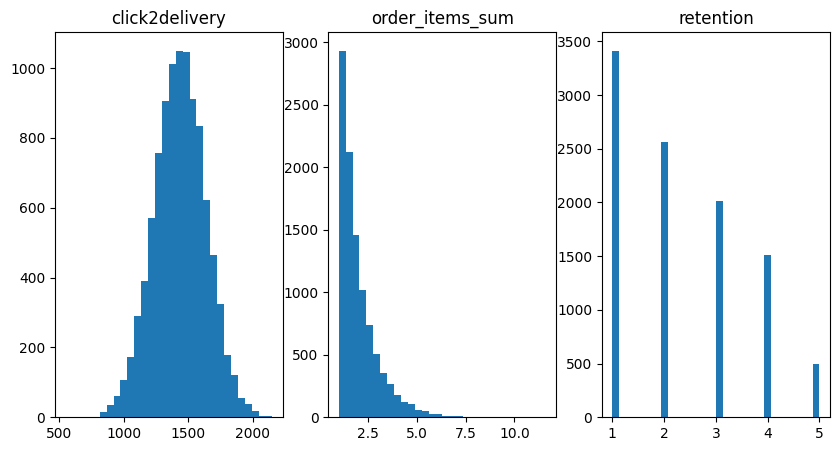

In [35]:
# Pисуем гистограммы
plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.hist(df['click2delivery'], bins=30)
plt.title('click2delivery')

plt.subplot(1,3,2)
plt.hist(df['order_items_sum'], bins=30)
plt.title('order_items_sum')

plt.subplot(1,3,3)
plt.hist(df['retention'], bins=30)
plt.title('retention')

plt.show()

Задача 6 построй график который наиболее по твоему мнению описывает зависимость времени заставки заказа от его номера pandas обоснуй почему ты так считаешь

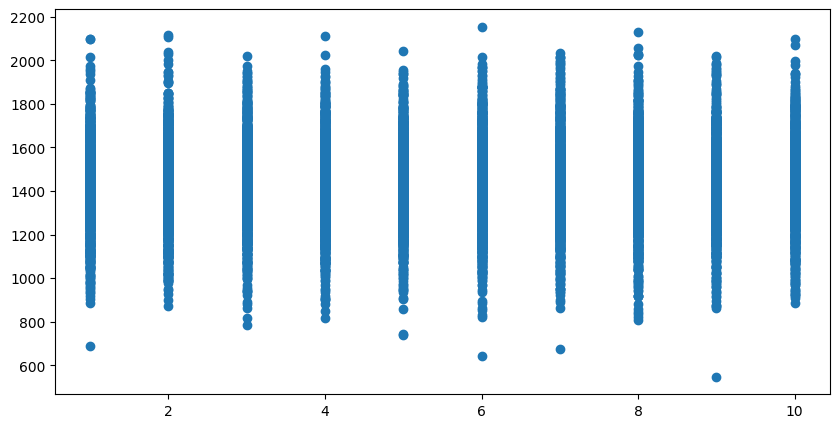

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(df['order_number'], df['click2delivery'])

plt.show()